#Homework 3
####Group Members: Yash Shah, Zheng Wan and Larry Sang

##Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

##Download Stock Adj.Close Data

In [ ]:
def fetch_sp500_data(start_date, end_date):
    def get_sp500_tickers():
        table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
        sp500 = table[0]
        tickers = sp500['Symbol'].tolist()
        tickers = [ticker.replace('.', '-') for ticker in tickers]
        return tickers

    def download_data(tickers, start_date, end_date):
        try:
            data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
            return data
        except Exception as e:
            print(f"Failed to download data: {e}")
            return None

    tickers = get_sp500_tickers()
    return download_data(tickers, start_date, end_date)

start_date = '2010-01-01'
end_date = datetime.date.today().strftime('%Y-%m-%d')

sp500_data = fetch_sp500_data(start_date, end_date)
if sp500_data is not None:
    sp500_data.head()

[*********************100%%**********************]  503 of 503 completed


In [ ]:
sp500_data.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.122227,4.496876,6.461976,NaN,NaN,18.952160,7.994444,32.212471,37.090000,22.530378,...,52.883568,9.905469,41.431484,12.918813,39.913586,NaN,19.158098,52.587044,28.670000,NaN
2010-01-05,19.903643,5.005957,6.473149,NaN,NaN,18.799036,7.967778,32.411549,37.700001,22.494810,...,52.765049,10.115748,43.951302,12.765600,40.069424,NaN,19.092577,54.251751,28.620001,NaN
2010-01-06,19.832928,4.798553,6.370184,NaN,NaN,18.903440,7.933333,32.756104,37.619999,22.452120,...,53.614506,10.003901,43.374786,12.790113,40.415749,NaN,18.956087,54.234230,28.400000,NaN
2010-01-07,19.807215,4.939965,6.358407,NaN,NaN,19.060047,7.886667,32.725479,36.889999,22.274269,...,53.456474,9.959156,44.301105,12.734961,40.288784,NaN,18.950636,55.478371,27.690001,NaN
2010-01-08,19.800795,4.845691,6.400682,NaN,NaN,19.157484,7.871111,32.595314,36.689999,22.402321,...,53.397198,9.867440,43.983696,12.741084,40.127151,NaN,18.956087,54.313091,27.600000,NaN


##Calculate log returns

In [ ]:
def calculate_log_returns(data):
    """
    Calculate log returns directly from the adjusted close prices.
    """
    log_prices = np.log(data)  # Calculate the natural logarithm of the adjusted close prices
    log_returns = np.diff(log_prices, axis=0) * 100  # Calculate the difference between successive log prices and convert to percentage
    log_returns = np.vstack([np.zeros(data.shape[1]), log_returns])  # Append zeros for the first day to align with the original data shape

    return pd.DataFrame(log_returns, index=data.index, columns=data.columns)

if sp500_data is not None:
    stock_returns = calculate_log_returns(sp500_data)

In [ ]:
stock_returns

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,-1.092225,10.724575,0.172758,NaN,NaN,-0.811231,-0.334110,0.616112,1.631272,-0.157993,...,-0.224364,2.100643,5.904116,-1.193053,0.389678,NaN,-0.342589,3.116549,-0.174548,NaN
2010-01-06,-0.355919,-4.231412,-1.603425,NaN,NaN,0.553835,-0.433244,1.057451,-0.212432,-0.189959,...,1.597064,-1.111839,-1.320393,0.191842,0.860598,NaN,-0.717452,-0.032301,-0.771667,NaN
2010-01-07,-0.129732,2.904369,-0.185054,NaN,NaN,0.825043,-0.589966,-0.093536,-1.959530,-0.795287,...,-0.295190,-0.448274,2.113132,-0.432147,-0.314641,NaN,-0.028761,2.268097,-2.531778,NaN
2010-01-08,-0.032418,-1.926840,0.662674,NaN,NaN,0.509908,-0.197437,-0.398542,-0.543629,0.573240,...,-0.110949,-0.925186,-0.719061,0.048073,-0.401992,NaN,0.028761,-2.122794,-0.325557,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-16,0.149159,-1.009088,0.063229,0.341326,0.948845,0.267360,0.965991,-0.168685,-0.510211,-0.758375,...,0.292963,-0.800388,-0.523806,0.107484,-0.600551,-0.774955,2.371545,0.206433,-1.245883,0.247850
2024-05-17,-0.051858,-0.406507,0.015801,1.251637,-1.044912,-0.746564,2.172147,-1.442169,0.113833,-0.018680,...,0.397053,0.192677,-0.072295,-0.592617,1.490488,0.447563,0.000000,-0.869897,-0.617790,0.201277
2024-05-20,0.265486,-1.435916,0.614319,-1.123947,0.486247,-0.849014,-0.815276,0.692617,0.260300,1.575709,...,-1.684658,-0.837635,0.894840,0.985758,-0.814071,1.695012,-1.414736,-0.944702,0.711543,0.189411


In [ ]:
print(stock_returns.shape)

(3621, 503)


##Load FF Data

In [ ]:
# Load Fama-French factors data
ff_data = pd.read_csv('/content/F-F_Research_Data_5_Factors_2x3_daily.CSV', sep=',', skiprows=2, encoding='ISO-8859-1')
# Convert the first column to a datetime format
ff_data['Date'] = pd.to_datetime(ff_data.iloc[:,0], format='%Y%m%d')

# Now 'Date' is a datetime object which can be used for merging, indexing, etc.
ff_data.set_index('Date', inplace=True)  # Set Date as the index if needed

ff_data.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,
1963-07-01,19630701,-0.67,0.02,-0.35,0.03,0.13,0.012
1963-07-02,19630702,0.79,-0.28,0.28,-0.08,-0.21,0.012
1963-07-03,19630703,0.63,-0.18,-0.10,0.13,-0.25,0.012
1963-07-05,19630705,0.40,0.09,-0.28,0.07,-0.30,0.012
1963-07-08,19630708,-0.63,0.07,-0.20,-0.27,0.06,0.012


In [ ]:
ff_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15290 entries, 1963-07-01 to 2024-03-28
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15290 non-null  int64  
 1   Mkt-RF      15290 non-null  float64
 2   SMB         15290 non-null  float64
 3   HML         15290 non-null  float64
 4   RMW         15290 non-null  float64
 5   CMA         15290 non-null  float64
 6   RF          15290 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 955.6 KB


##Calculate Excess Return

In [ ]:
aligned_data = stock_returns.merge(ff_data, left_index=True, right_index=True, how='inner', suffixes=('', '_ff'))
aligned_data.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,ZBH,ZBRA,ZTS,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA_ff,RF_ff
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,20100104,1.69,0.79,1.13,-0.17,0.21,0.0
2010-01-05,-1.092225,10.724575,0.172758,NaN,NaN,-0.811231,-0.334110,0.616112,1.631272,-0.157993,...,3.116549,-0.174548,NaN,20100105,0.31,-0.41,1.24,-0.19,0.19,0.0
2010-01-06,-0.355919,-4.231412,-1.603425,NaN,NaN,0.553835,-0.433244,1.057451,-0.212432,-0.189959,...,-0.032301,-0.771667,NaN,20100106,0.13,-0.13,0.57,-0.05,0.20,0.0
2010-01-07,-0.129732,2.904369,-0.185054,NaN,NaN,0.825043,-0.589966,-0.093536,-1.959530,-0.795287,...,2.268097,-2.531778,NaN,20100107,0.40,0.25,0.98,-0.69,0.22,0.0
2010-01-08,-0.032418,-1.926840,0.662674,NaN,NaN,0.509908,-0.197437,-0.398542,-0.543629,0.573240,...,-2.122794,-0.325557,NaN,20100108,0.33,0.32,0.01,0.22,-0.37,0.0


In [ ]:
aligned_data.tail()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,ZBH,ZBRA,ZTS,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA_ff,RF_ff
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-22,-0.871075,0.270270,0.529610,0.533783,-0.190449,-0.846549,-0.011030,-2.206583,-2.321109,-0.843930,...,0.102251,-1.234456,0.343982,20240322,-0.23,-0.98,-0.53,0.29,-0.37,0.021
2024-03-25,-1.290075,0.672500,-0.833503,0.044817,0.077418,-0.507746,0.341276,-1.096357,1.531696,-1.499476,...,0.556627,2.205797,-0.647442,20240325,-0.26,-0.10,0.88,-0.22,-0.17,0.021
2024-03-26,-0.793188,0.000000,-0.669489,0.369008,-0.357807,1.345329,-0.440580,0.766928,0.072918,-0.879901,...,-0.031277,-2.226386,-1.283459,20240326,-0.26,0.10,-0.13,-0.50,0.23,0.021
2024-03-27,2.028996,2.515024,2.099071,0.645277,-0.587177,1.760203,0.977661,1.343528,-0.632416,2.286319,...,3.827700,2.635029,1.699723,20240327,0.88,1.29,0.91,-0.14,0.58,0.021
2024-03-28,-1.270170,0.326266,-1.061522,0.965651,-0.875158,0.158496,1.043941,1.649364,0.039646,2.280725,...,-0.476213,0.759244,0.414556,20240328,0.10,0.45,0.48,-0.07,0.09,0.021


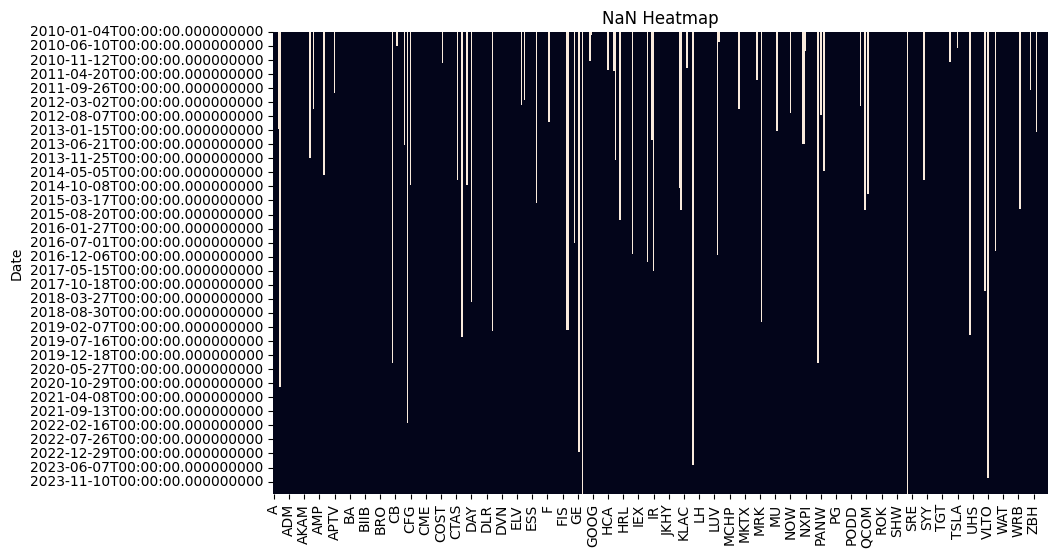

In [ ]:
# Create a heatmap showing where NaN values are located
plt.figure(figsize=(10, 6))
sns.heatmap(aligned_data.isna(), cbar=False)
plt.title('NaN Heatmap')
plt.show()

In [ ]:
print(aligned_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3583 entries, 2010-01-04 to 2024-03-28
Columns: 510 entries, A to RF_ff
dtypes: float64(509), int64(1)
memory usage: 14.0 MB
None


In [ ]:
# Calculate NaN counts
nan_counts_aligned = aligned_data.isna().sum()

# Identify columns with NaN counts over 3600
columns_with_excessive_nans = nan_counts_aligned[nan_counts_aligned > 3581].index.tolist()

# Output these column names
print("Columns with more than 3581 NaN values in aligned data:", columns_with_excessive_nans)

Columns with more than 3581 NaN values in aligned data: ['GEV', 'SOLV']


In [ ]:
#drop nan columns
aligned_data = aligned_data.drop(columns=['GEV', 'SOLV'])
print(aligned_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3583 entries, 2010-01-04 to 2024-03-28
Columns: 508 entries, A to RF_ff
dtypes: float64(507), int64(1)
memory usage: 13.9 MB
None


In [ ]:
#drop unnamed column
aligned_data = aligned_data.drop(columns='Unnamed: 0')
#fillna with 0
aligned_data = aligned_data.fillna(0)
aligned_data.isnull().sum()

A         0
AAL       0
AAPL      0
ABBV      0
ABNB      0
         ..
SMB       0
HML       0
RMW       0
CMA_ff    0
RF_ff     0
Length: 507, dtype: int64

#Question 1


####We assume that the errors are homoscedastic

In [ ]:
def perform_regression(data, stock_symbol):
    # Calculate excess returns
    y = data[stock_symbol] - data['RF_ff']
    X = data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA_ff']]
    X = sm.add_constant(X)  # Add a constant term for the intercept

    model = sm.OLS(y, X)
    results = model.fit()
    # Concatenate the results: params, t-values, and R-squared
    return pd.concat([results.params, results.tvalues, pd.Series(results.rsquared, index=['R_squared'])])

# Get a list of stock columns, assuming they are named differently from the Fama-French factor and RF columns
stock_columns = [col for col in aligned_data.columns if col not in ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA_ff', 'RF_ff']]

# Prepare DataFrame to store results
results_df = pd.DataFrame(index=stock_columns, columns=np.arange(13))  # 500x13 matrix

# Iterate over each stock to perform regression
for stock in stock_columns:
    regression_result = perform_regression(aligned_data, stock)
    results_df.loc[stock] = regression_result.values

# Naming columns appropriately
results_df.columns = ['const', 'Beta_Mkt-RF', 'Beta_SMB', 'Beta_HML', 'Beta_RMW', 'Beta_CMA',
                      't_const', 't_Beta_Mkt-RF', 't_Beta_SMB', 't_Beta_HML', 't_Beta_RMW', 't_Beta_CMA', 'R_squared']

# Display the final results dataframe
results_df.head()

,const,Beta_Mkt-RF,Beta_SMB,Beta_HML,Beta_RMW,Beta_CMA,t_const,t_Beta_Mkt-RF,t_Beta_SMB,t_Beta_HML,t_Beta_RMW,t_Beta_CMA,R_squared
A,-0.007775,1.138112,0.08595,-0.188327,-0.233239,0.21963,-0.375027,56.23692,2.321009,-5.24828,-4.690041,3.241944,0.531715
AAL,-0.032421,1.276904,0.782809,0.723129,0.185004,-0.30601,-0.714597,28.831743,9.659683,9.208644,1.699936,-2.064074,0.298181
AAPL,0.015599,1.174487,-0.145672,-0.509957,0.574021,0.022829,0.771478,59.504205,-4.033373,-14.571373,11.83493,0.345517,0.535771
ABBV,0.018512,0.606628,-0.150625,-0.154016,0.204799,0.248734,0.822247,27.602609,-3.74559,-3.952401,3.792228,3.380956,0.181068
ABNB,-0.006691,0.260295,0.176061,-0.217525,-0.581733,-0.410123,-0.278259,11.090145,4.099482,-5.226957,-10.086335,-5.219917,0.162281


In [ ]:
print(results_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, A to ZTS
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   const          501 non-null    object
 1   Beta_Mkt-RF    501 non-null    object
 2   Beta_SMB       501 non-null    object
 3   Beta_HML       501 non-null    object
 4   Beta_RMW       501 non-null    object
 5   Beta_CMA       501 non-null    object
 6   t_const        501 non-null    object
 7   t_Beta_Mkt-RF  501 non-null    object
 8   t_Beta_SMB     501 non-null    object
 9   t_Beta_HML     501 non-null    object
 10  t_Beta_RMW     501 non-null    object
 11  t_Beta_CMA     501 non-null    object
 12  R_squared      501 non-null    object
dtypes: object(13)
memory usage: 71.0+ KB
None


#Question 2

In [ ]:
# Compute descriptive statistics for each column
descriptive_stats = results_df.describe()
descriptive_stats

,const,Beta_Mkt-RF,Beta_SMB,Beta_HML,Beta_RMW,Beta_CMA,t_const,t_Beta_Mkt-RF,t_Beta_SMB,t_Beta_HML,t_Beta_RMW,t_Beta_CMA,R_squared
count,501.000000,501.000000,501.00000,501.000000,501.000000,501.00000,501.000000,501.00000,501.000000,501.00000,501.000000,501.000000,501.000000
unique,501.000000,501.000000,501.00000,501.000000,501.000000,501.00000,501.000000,501.00000,501.000000,501.00000,501.000000,501.000000,501.000000
top,-0.007775,1.138112,0.08595,-0.188327,-0.233239,0.21963,-0.375027,56.23692,2.321009,-5.24828,-4.690041,3.241944,0.531715
freq,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
specific_statistics_df = pd.DataFrame({ 'Mean': results_df.mean(), 'Variance': results_df.var(), 'Std': results_df.std(), 'Min': results_df.min(), 'Max': results_df.max(), '25th-Percentile': results_df.quantile(0.25), 'Median': results_df.median(), '75th-Percentile': results_df.quantile(0.75), 'Interquartile-Range': results_df.quantile(0.75) - results_df.quantile(0.25), 'Skewness': results_df.skew(), 'Kurtosis': results_df.kurtosis() })
specific_statistics_df

,Mean,Variance,Std,Min,Max,25th-Percentile,Median,75th-Percentile,Interquartile-Range,Skewness,Kurtosis
const,-0.003985,0.000568,0.023825,-0.085995,0.074503,-0.017763,-0.004424,0.009619,0.027383,0.033106,0.848158
Beta_Mkt-RF,0.95302,0.059303,0.243522,0.011003,1.625679,0.808387,0.964493,1.116613,0.308226,-0.386247,1.03667
Beta_SMB,0.141555,0.080598,0.283898,-0.382431,1.500669,-0.079197,0.114561,0.310572,0.389769,0.684331,0.749677
Beta_HML,0.152294,0.223866,0.473145,-0.791585,1.851552,-0.171166,0.075534,0.354732,0.525899,1.000468,1.09344
Beta_RMW,0.104772,0.084814,0.291228,-0.886514,0.806333,-0.057984,0.163143,0.314278,0.372262,-0.702136,0.417024
Beta_CMA,0.017264,0.198087,0.44507,-1.630325,1.011251,-0.229019,0.072839,0.319178,0.548197,-0.719523,0.796332
t_const,-0.170591,0.851274,0.922645,-2.993332,2.639704,-0.79633,-0.21911,0.433426,1.229756,0.098209,-0.141356
t_Beta_Mkt-RF,42.811866,177.921632,13.338727,2.032174,84.996567,33.912175,41.213239,50.890895,16.978721,0.261188,0.403547
t_Beta_SMB,2.422807,38.912651,6.238001,-15.175865,19.12439,-2.304776,2.733872,7.191828,9.496604,-0.206483,-0.509144
t_Beta_HML,4.181732,150.296726,12.259557,-16.134004,51.147552,-4.468432,2.118037,8.610153,13.078585,1.521393,2.902449


#Question 3

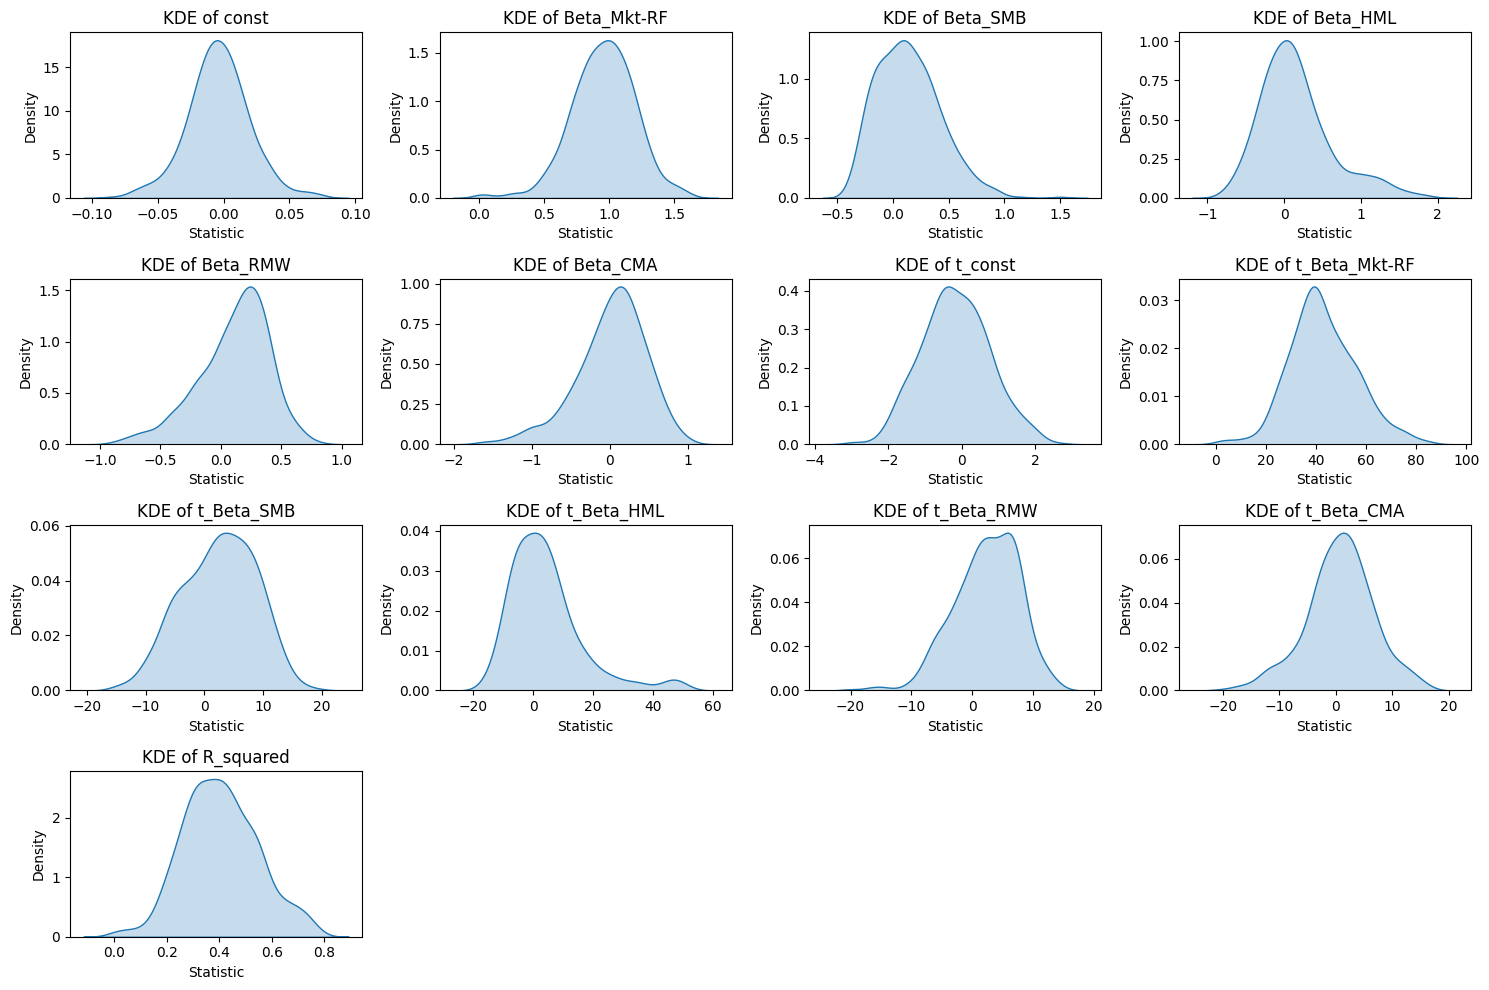

In [ ]:
plt.figure(figsize=(15, 10))

# Plot each t-statistic's density
for i, col in enumerate(results_df):
    plt.subplot(4, 4, i + 1)  # Adjust subplot layout based on how many plots you need
    sns.kdeplot(results_df[col], fill=True)
    plt.title(f'KDE of {col}')
    plt.xlabel('Statistic')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


----
### 1. Constant (Alpha)
The constant term in a Fama-French model regression is often referred to as alpha. Alpha represents the asset's or portfolio's excess return that is not explained by the risk factors included in the model. It is essentially the intercept of the regression:

- **Positive Alpha:** Indicates that the asset or portfolio has performed better than predicted by the model after accounting for the risks (as defined by the model factors). This suggests superior performance relative to the benchmarks set by the model's factors.
  
- **Negative Alpha:** Indicates underperformance relative to the expected returns given the risks taken, as per the model's factors.
  
#### Interpretation:
Alpha is particularly significant for investment managers and investors as it represents the return gained from active management rather than the market performance. A statistically significant alpha (one whose t-statistic suggests it is significantly different from zero) is highly valued as it implies skill or other advantage.

### 2. Beta Coefficients
Beta coefficients in the FF model measure the sensitivity of the returns of a stock or portfolio to the movements in the factors of the model. Each factor has its own beta coefficient:

- **Market Beta (Beta_Mkt-RF):** This coefficient measures the sensitivity of the stock/portfolio returns to the excess market returns (market returns minus the risk-free rate). A beta greater than 1 indicates that the asset is more volatile than the market, while a beta less than 1 indicates it is less volatile.
  
- **Size Beta (Beta_SMB, Small Minus Big):** This measures the sensitivity of the returns to the size premium, which is the tendency for stocks in smaller firms to outperform stocks in larger firms, on average.
  
- **Value Beta (Beta_HML, High Minus Low):** This is the sensitivity of the returns to the value premium, which captures the excess returns of stocks with high book-to-market ratios over those with low ratios.
  
- **Profitability Beta (Beta_RMW, Robust Minus Weak):** This coefficient measures how much the returns of the stock/portfolio are affected by profitability factors. It captures the performance differential between companies with robust operating profitability versus those with weak profitability.
  
- **Investment Beta (Beta_CMA, Conservative Minus Aggressive):** It indicates sensitivity to the investment factor, reflecting the difference in returns between firms that invest conservatively and those that invest aggressively.

----

----

### Zero Hypothesis Testing:
The t-statistic tests the null hypothesis that the coefficient is equal to zero, which implies that the factor has no effect on the dependent variable (returns of a stock or portfolio in this case).

### Significance Levels:
- A large absolute value of the t-statistic (typically greater than 2 or less than -2 in absolute terms for a 95% confidence level) indicates that the null hypothesis can be rejected, suggesting that the coefficient is statistically significant.
  
- A small t-statistic (close to zero) suggests that the coefficient is not significantly different from zero, indicating that the factor does not have a statistically significant impact on the returns.

### Positive vs. Negative T-Statistics:
- **Positive T-Statistic:** Indicates a positive relationship between the factor and the asset returns if the coefficient is positive. This means as the factor value increases, the asset return also tends to increase.
  
- **Negative T-Statistic:** Indicates a negative relationship if the coefficient is negative. This means as the factor value increases, the asset return tends to decrease.

----

#Question 4

In [ ]:
def get_sp500_tickers_and_industry():
    # Fetch the table from Wikipedia
    table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    sp500 = table[0]
    # Select only the 'Symbol' and 'GICS Sector' columns
    tickers_and_industry = sp500[['Symbol', 'GICS Sector']]
    # Replace dots with hyphens in the tickers for Yahoo Finance compatibility
    tickers_and_industry['Symbol'] = tickers_and_industry['Symbol'].apply(lambda x: x.replace('.', '-'))
    return tickers_and_industry


In [ ]:
# Example of using the function
sp500_tickers_and_industry = get_sp500_tickers_and_industry()
sp500_tickers_and_industry

<ipython-input-21-683ee2b45575>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickers_and_industry['Symbol'] = tickers_and_industry['Symbol'].apply(lambda x: x.replace('.', '-'))


,Symbol,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology
...,...,...
498,XYL,Industrials
499,YUM,Consumer Discretionary
500,ZBRA,Information Technology
501,ZBH,Health Care


In [ ]:
# 11 different industries
sp500_tickers_and_industry['GICS Sector'].value_counts()

GICS Sector
Industrials               79
Financials                71
Information Technology    65
Health Care               64
Consumer Discretionary    52
Consumer Staples          38
Utilities                 31
Real Estate               31
Materials                 28
Communication Services    22
Energy                    22
Name: count, dtype: int64

In [ ]:
merged_df = pd.merge(sp500_tickers_and_industry.iloc[:, :2], results_df, left_on=sp500_tickers_and_industry.columns[0], right_index=True, how='inner')
merged_df.dropna(inplace=True)

merged_df


,Symbol,GICS Sector,const,Beta_Mkt-RF,Beta_SMB,Beta_HML,Beta_RMW,Beta_CMA,t_const,t_Beta_Mkt-RF,t_Beta_SMB,t_Beta_HML,t_Beta_RMW,t_Beta_CMA,R_squared
0,MMM,Industrials,-0.035003,0.906726,0.122174,0.12269,0.419638,0.335622,-2.075251,55.072006,4.055334,4.202736,10.372136,6.08952,0.501317
1,AOS,Industrials,0.016212,0.977351,0.513165,0.019682,0.40028,0.141365,0.765313,47.263996,13.562226,0.536797,7.877375,2.04221,0.463192
2,ABT,Health Care,-0.003555,0.857237,-0.303362,-0.310888,0.03303,0.442011,-0.209752,51.813883,-10.020782,-10.597835,0.812444,7.980975,0.449314
3,ABBV,Health Care,0.018512,0.606628,-0.150625,-0.154016,0.204799,0.248734,0.822247,27.602609,-3.74559,-3.952401,3.792228,3.380956,0.181068
4,ACN,Information Technology,0.004007,1.051777,-0.09799,-0.056495,0.225434,-0.158084,0.240426,64.650345,-3.291723,-1.95852,5.639044,-2.902769,0.577614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,XYL,Industrials,-0.001922,0.87252,0.202361,0.111647,0.424743,-0.120883,-0.09552,44.42935,5.63138,3.20635,8.801542,-1.838811,0.410233
499,YUM,Consumer Discretionary,0.002131,0.855736,-0.025149,0.016591,0.312886,0.145933,0.106465,43.792694,-0.703368,0.47885,6.516092,2.23097,0.373234
500,ZBRA,Information Technology,-0.003372,1.202707,0.501743,-0.242654,0.145436,-0.076895,-0.113664,41.535701,9.469721,-4.726257,2.043956,-0.793296,0.404624
501,ZBH,Health Care,-0.023844,0.861923,0.180859,0.128883,0.1249,-0.057783,-1.113279,41.227399,4.727712,3.476799,2.43119,-0.825652,0.382956


In [ ]:
# Convert columns that should be numeric but are not
numeric_cols = ['const','Beta_Mkt-RF', 'Beta_SMB', 'Beta_HML', 'Beta_RMW', 'Beta_CMA',
                't_const', 't_Beta_Mkt-RF', 't_Beta_SMB', 't_Beta_HML', 't_Beta_RMW', 't_Beta_CMA', 'R_squared']

# Explicitly convert these columns to numeric, forcing errors to NaN to catch problematic data
for col in numeric_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Now group by 'GICS Sector' and calculate the mean, std, and median
grouped = merged_df.groupby('GICS Sector')[numeric_cols].agg(['mean', 'std', 'median'])

# Print the grouped DataFrame
grouped

const                     Beta_Mkt-RF            \
                            mean       std    median        mean       std   
GICS Sector                                                                  
Communication Services -0.006980  0.028110 -0.006198    0.876468  0.213943   
Consumer Discretionary -0.002712  0.031251  0.001231    1.034876  0.210075   
Consumer Staples       -0.005260  0.018420 -0.008549    0.667051  0.174427   
Energy                 -0.020616  0.030164 -0.017213    1.093009  0.166521   
Financials             -0.002876  0.020016  0.000115    1.040015  0.186582   
Health Care             0.003325  0.019610  0.002272    0.858218  0.180773   
Industrials            -0.000816  0.020362 -0.002288    0.978704  0.251597   
Information Technology  0.001271  0.028177  0.001631    1.136259  0.198019   
Materials              -0.016374  0.021250 -0.014101    0.994533  0.261768   
Real Estate            -0.011472  0.017947 -0.012193    0.889885  0.160771   
Utilities              -0.008340  0.018431 -0.005902    0.691450  0.142937   

                                  Beta_SMB                      Beta_HML  ...  \
                          median      mean       std    median      mean  ...   
GICS Sector                                                               ...   
Communication Services  0.926999  0.139816  0.293375  0.054778  0.033476  ...   
Consumer Discretionary  1.055063  0.437360  0.280234  0.455245  0.087834  ...   
Consumer Staples        0.666207 -0.066874  0.187370 -0.105525 -0.089650  ...   
Energy                  1.117744  0.175873  0.160445  0.142496  0.988614  ...   
Financials              1.043003 -0.015483  0.176550 -0.036057  0.695797  ...   
Health Care             0.885909  0.062089  0.229202  0.053755 -0.209711  ...   
Industrials             1.025750  0.268986  0.272040  0.215839  0.168113  ...   
Information Technology  1.138960  0.205351  0.278408  0.192826 -0.192640  ...   
Materials               1.006873  0.251536  0.200096  0.294534  0.337055  ...   
Real Estate             0.846345  0.161278  0.231871  0.136027  0.148948  ...   
Utilities               0.706297 -0.174554  0.129052 -0.206780  0.058608  ...   

                       t_Beta_HML t_Beta_RMW                     t_Beta_CMA  \
                           median       mean       std    median       mean   
GICS Sector                                                                   
Communication Services   3.922140   2.160537  3.746226  2.721254  -1.783118   
Consumer Discretionary   0.765338   5.134187  4.717928  5.910081  -2.162846   
Consumer Staples        -4.117053   7.452699  3.052459  7.609886   8.411557   
Energy                  19.061401  -4.534694  2.347335 -5.329386   2.047100   
Financials              21.100986  -3.314187  5.538677 -3.744508  -4.777141   
Health Care             -5.242829   0.521827  3.813997  0.812444   2.993784   
Industrials              4.722392   5.350158  3.757445  6.146309   1.294658   
Information Technology  -4.515188   1.796112  4.033665  2.066359  -2.409421   
Materials                7.829901   3.234125  4.209777  3.345996   1.308348   
Real Estate              4.361104   2.650394  3.166726  2.347913   2.534537   
Utilities                1.279320   4.761652  2.972414  5.642115   7.550158   

                                           R_squared                      
                             std    median      mean       std    median  
GICS Sector                                                               
Communication Services  5.615141 -1.378005  0.338392  0.111698  0.308719  
Consumer Discretionary  4.676840 -1.348839  0.367988  0.085400  0.375002  
Consumer Staples        5.204720  8.378221  0.270568  0.101991  0.254507  
Energy                  2.999907  1.761218  0.406095  0.091518  0.410673  
Financials              6.445139 -2.959773  0.572046  0.134624  0.568079  
Health Care             3.946545  3.063809  0.324391  0.102828  0.328642  
Industrials      

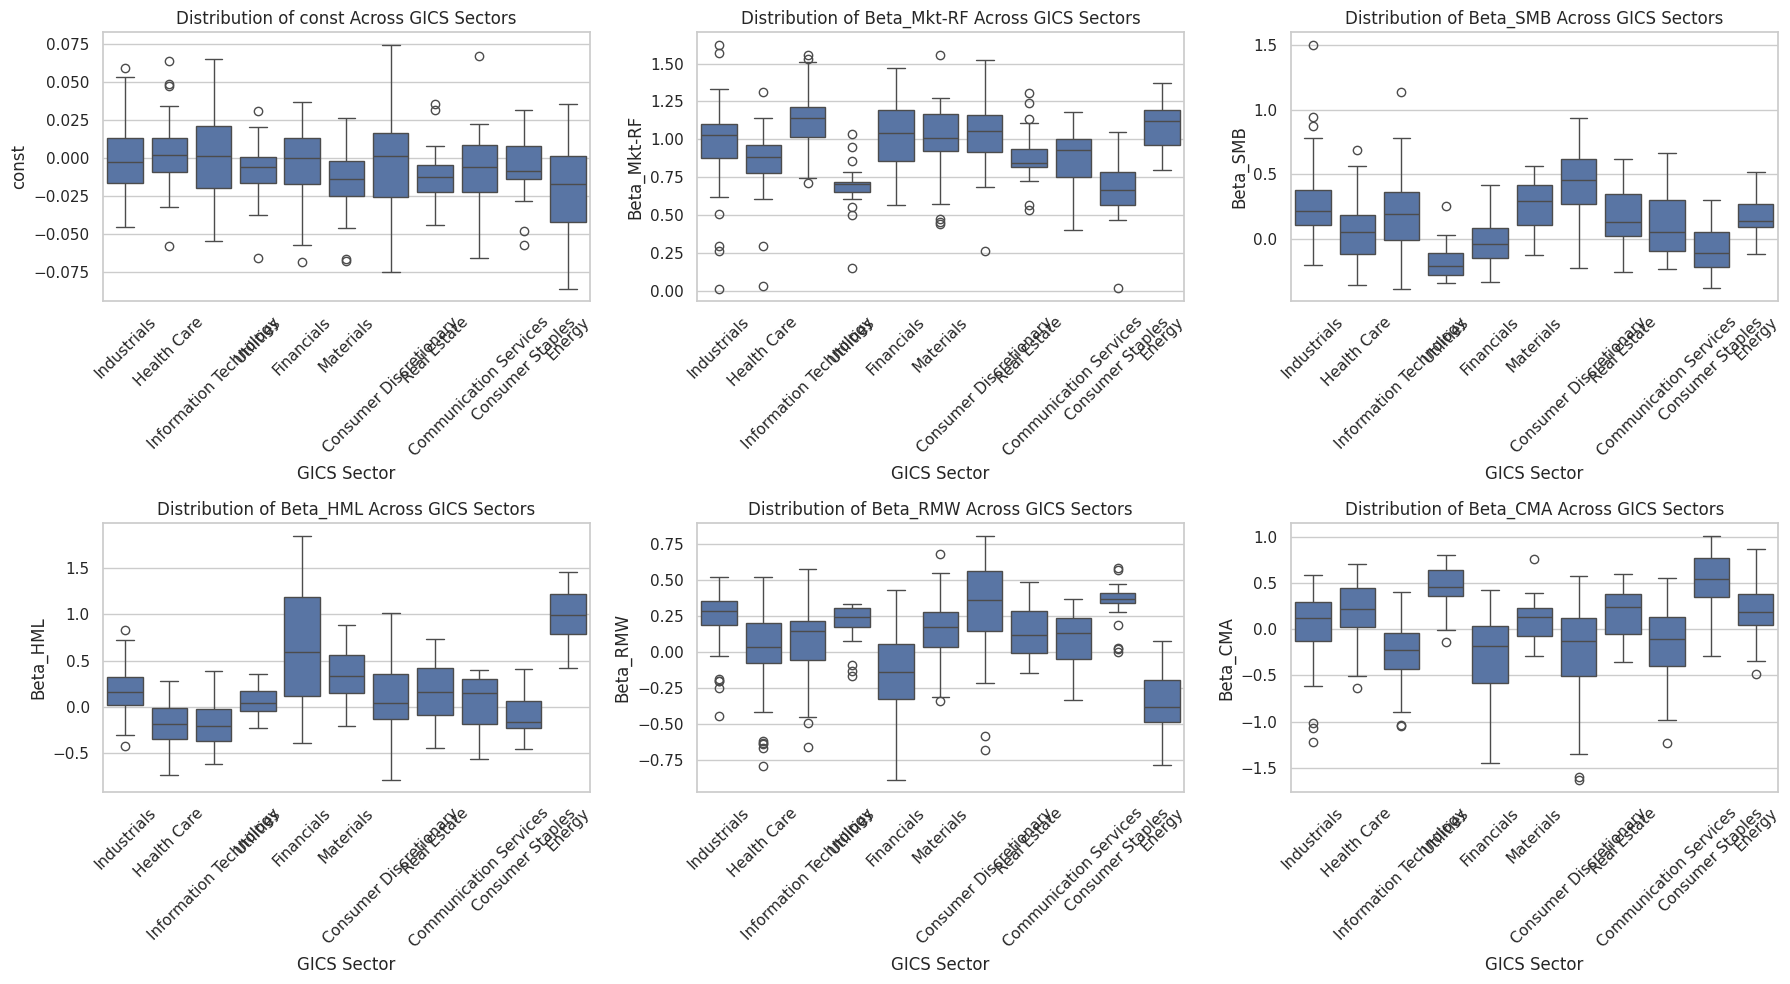

In [ ]:
# List of all factors including the constant
factors = ['const', 'Beta_Mkt-RF', 'Beta_SMB', 'Beta_HML', 'Beta_RMW', 'Beta_CMA']

# Set plot dimensions and style
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")

# Create a subplot for each factor
for i, factor in enumerate(factors, 1):
    plt.subplot(2, 3, i)  # Adjust the grid size based on the number of factors
    sns.boxplot(x='GICS Sector', y=factor, data=merged_df)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {factor} Across GICS Sectors')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

Based on the provided output, we can observe variations in the estimated factor coefficients across the 11 sectors of the Global Industry Classification Standard (GICS). Here's a summary of the differences:

1. **Constant (const):** The average constant term differs across sectors, ranging from slightly negative values in sectors like Utilities and Real Estate to slightly positive values in sectors like Information Technology and Health Care.

2. **Beta_Mkt-RF:** The average sensitivity to market changes (Beta_Mkt-RF) varies across sectors, with Financials, Information Technology, and Energy having relatively higher average values compared to sectors like Consumer Staples and Utilities.

3. **Beta_SMB:** Sectors like Consumer Discretionary and Materials exhibit higher average sensitivity to small-cap stocks (Beta_SMB), while sectors like Consumer Staples and Utilities have negative or lower average values.

4. **Beta_HML:** Financials and Energy sectors tend to have higher average sensitivity to the high-minus-low factor (Beta_HML), indicating a stronger performance relative to value stocks.

5. **Beta_RMW:** Consumer Staples and Consumer Discretionary sectors show higher average sensitivity to the robust-minus-weak factor (Beta_RMW), suggesting variations in profitability performance across sectors.

6. **Beta_CMA:** Consumer Staples, Utilities, and Health Care sectors tend to have higher average sensitivity to the conservative-minus-aggressive factor (Beta_CMA), implying differences in investment characteristics.

7. **T-statistics:** The significance of the coefficients varies across sectors. For instance, Financials generally exhibit high t-statistics for most coefficients, indicating greater significance compared to other sectors.

8. **R-squared:** The R-squared values, representing the explanatory power of the model, vary across sectors, with Financials having relatively higher values compared to sectors like Consumer Staples and Health Care.

In summary, there are notable differences in the estimated factor coefficients across sectors, reflecting the diverse characteristics and performance of companies within each sector according to the GICS classification.

#Question 5

In [ ]:
results_df

,const,Beta_Mkt-RF,Beta_SMB,Beta_HML,Beta_RMW,Beta_CMA,t_const,t_Beta_Mkt-RF,t_Beta_SMB,t_Beta_HML,t_Beta_RMW,t_Beta_CMA,R_squared,Cluster
A,-0.007775,1.138112,0.08595,-0.188327,-0.233239,0.21963,-0.375027,56.23692,2.321009,-5.24828,-4.690041,3.241944,0.531715,1
AAL,-0.032421,1.276904,0.782809,0.723129,0.185004,-0.30601,-0.714597,28.831743,9.659683,9.208644,1.699936,-2.064074,0.298181,2
AAPL,0.015599,1.174487,-0.145672,-0.509957,0.574021,0.022829,0.771478,59.504205,-4.033373,-14.571373,11.83493,0.345517,0.535771,1
ABBV,0.018512,0.606628,-0.150625,-0.154016,0.204799,0.248734,0.822247,27.602609,-3.74559,-3.952401,3.792228,3.380956,0.181068,3
ABNB,-0.006691,0.260295,0.176061,-0.217525,-0.581733,-0.410123,-0.278259,11.090145,4.099482,-5.226957,-10.086335,-5.219917,0.162281,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,-0.001922,0.87252,0.202361,0.111647,0.424743,-0.120883,-0.09552,44.42935,5.63138,3.20635,8.801542,-1.838811,0.410233,0
YUM,0.002131,0.855736,-0.025149,0.016591,0.312886,0.145933,0.106465,43.792694,-0.703368,0.47885,6.516092,2.23097,0.373234,0
ZBH,-0.023844,0.861923,0.180859,0.128883,0.1249,-0.057783,-1.113279,41.227399,4.727712,3.476799,2.43119,-0.825652,0.382956,0
ZBRA,-0.003372,1.202707,0.501743,-0.242654,0.145436,-0.076895,-0.113664,41.535701,9.469721,-4.726257,2.043956,-0.793296,0.404624,2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

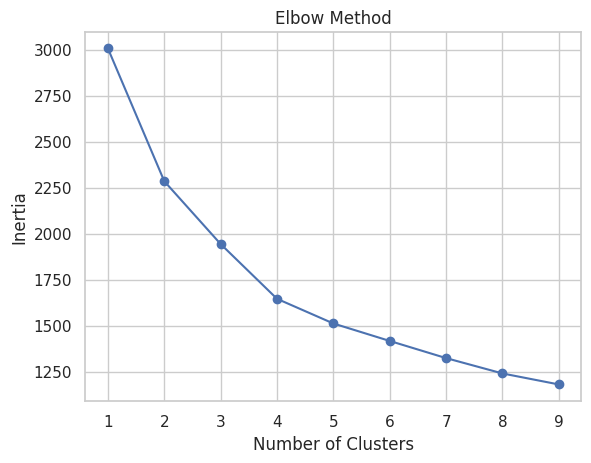

In [ ]:
# features
features = merged_df[['const', 'Beta_Mkt-RF', 'Beta_SMB', 'Beta_HML', 'Beta_RMW', 'Beta_CMA']]
features_clean = features.dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_clean)

# Elbow method to determine the optimal number of clusters
inertia = []
range_values = range(1, 10)  # Test for 1 to 10 clusters

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range_values, inertia, 'o-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
results_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze cluster centroids
results_df.groupby('Cluster').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,const,Beta_Mkt-RF,Beta_SMB,Beta_HML,Beta_RMW,Beta_CMA,t_const,t_Beta_Mkt-RF,t_Beta_SMB,t_Beta_HML,t_Beta_RMW,t_Beta_CMA,R_squared
Cluster,,,,,,,,,,,,,
0,-0.01325,0.928356,0.104812,0.242233,0.141867,0.195827,-0.508099,42.762058,1.028536,5.836436,3.177438,3.21848,0.394895
1,-0.005962,0.946867,0.159773,0.164759,0.126232,-0.004624,-0.2531,43.687153,3.162636,4.84035,2.377747,0.23316,0.416814
2,-0.005515,1.00571,0.179694,0.223753,0.091615,-0.063901,-0.233524,44.959928,3.12608,5.946443,1.724567,-0.345602,0.432982
3,0.002702,0.903342,0.143397,0.124992,0.114455,0.011163,0.048288,40.931863,2.350291,3.542973,2.784704,0.749011,0.387328
4,-0.000082,0.947425,0.117657,0.164623,0.116465,0.032346,-0.019978,41.405455,1.806126,3.798457,2.254575,0.940297,0.381369
5,-0.00264,0.997024,0.135934,0.051421,0.042607,0.07475,-0.131819,43.194752,2.719996,2.337513,1.321892,1.080437,0.410179
6,-0.001445,0.984322,0.180463,0.02722,0.205567,0.020999,-0.075377,43.355953,3.379193,0.755969,4.282515,0.966768,0.401973
7,-0.0043,0.950043,0.120901,0.158512,0.081671,0.041696,-0.242779,42.92149,1.564022,4.738087,2.090988,1.161643,0.401299
8,-0.004878,0.947177,0.131332,0.172061,0.077245,-0.009635,-0.138255,42.183596,2.230231,4.297672,1.880287,0.411566,0.400122


In [ ]:
# Choose the optimal number of clusters based on the elbow method
optimal_k = 3

# Perform K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)

# Add the cluster labels to the DataFrame
merged_df['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

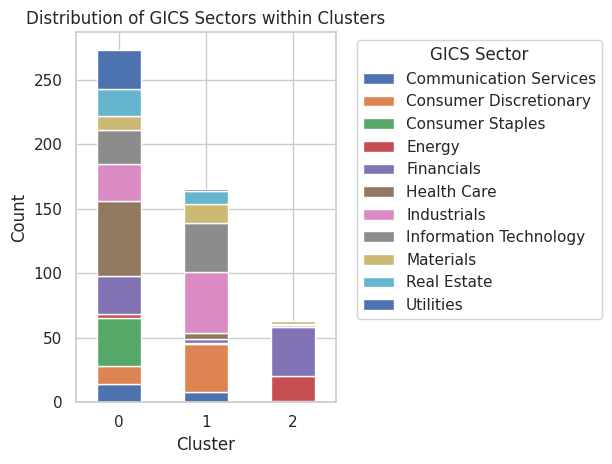

In [ ]:
# Count the number of companies from each GICS sector within each cluster
cluster_sector_counts = merged_df.groupby(['Cluster', 'GICS Sector']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
cluster_sector_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of GICS Sectors within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='GICS Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Count the number of companies from each GICS sector within each cluster
cluster_sector_counts = merged_df.groupby(['Cluster', 'GICS Sector']).size().unstack(fill_value=0)

# Loop through each cluster
for cluster in range(cluster_sector_counts.shape[0]):
    # Sum the counts of each GICS sector within the current cluster
    sector_counts = cluster_sector_counts.iloc[cluster].sort_values(ascending=False)

    # Display the sector counts for the current cluster in descending order
    print(f"\nCluster {cluster + 1} - Industry Occurrences (Descending Order):")
    for sector, count in sector_counts.items():
        print(f"{sector}: {count}")




Cluster 1 - Industry Occurrences (Descending Order):
Health Care: 58
Consumer Staples: 37
Financials: 30
Utilities: 30
Industrials: 29
Information Technology: 26
Real Estate: 21
Communication Services: 14
Consumer Discretionary: 14
Materials: 11
Energy: 3

Cluster 2 - Industry Occurrences (Descending Order):
Industrials: 47
Information Technology: 38
Consumer Discretionary: 37
Materials: 15
Real Estate: 10
Communication Services: 8
Health Care: 5
Financials: 3
Consumer Staples: 1
Utilities: 1
Energy: 0

Cluster 3 - Industry Occurrences (Descending Order):
Financials: 38
Energy: 19
Industrials: 2
Materials: 2
Consumer Discretionary: 1
Information Technology: 1
Communication Services: 0
Consumer Staples: 0
Health Care: 0
Real Estate: 0
Utilities: 0



- **Cluster 1**:
  - **Dominant Industries**: Health Care (58 occurrences), Consumer Staples (37 occurrences), and Financials (30 occurrences).
  - **Secondary Industries**: Utilities, Industrials, Information Technology, Real Estate, Communication Services, Consumer Discretionary, Materials, and Energy.
  - **Observation**: Cluster 1 is primarily composed of Health Care and Consumer Staples companies, indicating a focus on stable and defensive sectors. This contrasts with the interpretation in Image 1, where Financials and Energy were more prominent.

- **Cluster 2**:
  - **Dominant Industries**: Industrials (47 occurrences), Information Technology (38 occurrences), and Consumer Discretionary (37 occurrences).
  - **Secondary Industries**: Materials, Real Estate, Communication Services, Health Care, Financials, Consumer Staples, Utilities, and Energy.
  - **Observation**: Cluster 2 is heavily focused on Industrials and Information Technology, indicating a mix of traditional and innovative sectors. This partially aligns with Image 1's interpretation of Cluster 3 but also includes Consumer Discretionary prominently.

- **Cluster 3**:
  - **Dominant Industries**: Financials (38 occurrences), Energy (19 occurrences), and Industrials (2 occurrences).
  - **Secondary Industries**: Materials, Consumer Discretionary, Information Technology, and no occurrences in Communication Services, Consumer Staples, Health Care, Real Estate, and Utilities.
  - **Observation**: Cluster 3 is primarily composed of Financials and Energy companies, indicating a strong presence of traditional sectors. This aligns closely with Image 1's Cluster 1 interpretation.

### Conclusion:
The cluster logic in Image 2 suggests:
- **Cluster 1**: Focuses on stable and defensive sectors, particularly Health Care and Consumer Staples, differing from the traditional sector focus (Financials and Energy) in Image 1.
- **Cluster 2**: Represents a mix of traditional and innovative sectors, prominently featuring Industrials and Information Technology, which aligns with the innovative sector focus in Image 1's Cluster 3.
- **Cluster 3**: Consists mainly of Financials and Energy, matching the traditional sector focus indicated in Image 1 for Cluster 1.


#Question 6

In [ ]:
# Print the top five companies with the highest constants
top_five_highest = results_df.sort_values(by='const', ascending=False).head(5)
print("Top Five Companies with the Highest Constants:")
top_five_highest[['const']]

# Print the top five companies with the lowest constants
top_five_lowest = results_df.sort_values(by='const', ascending=True).head(5)
print("Top Five Companies with the Lowest Constants:")
top_five_lowest[['const']]

Top Five Companies with the Highest Constants:
         const
TSLA  0.074503
DPZ   0.073427
NFLX  0.067213
NVDA  0.065252
DXCM  0.063511
Top Five Companies with the Lowest Constants:
        const
APA -0.085995
CCL -0.074538
IVZ -0.068464
FCX -0.067522
MOS -0.066352


Tesla (TSLA), Domino's Pizza (DPZ), Netflix (NFLX), NVIDIA (NVDA), DexCom (DXCM) (Continuous glucose monitoring devices production and sales)



APA:

Primary Business: Exploration and production of oil and natural gas

Carnival Corporation & plc (CCL):

Primary Business: Cruise line operator

Invesco Ltd. (IVZ):

Primary Business: Investment management and financial services

Freeport-McMoRan Inc. (FCX):

Primary Business: Mining company primarily for copper, gold, and molybdenum

The Mosaic Company (MOS):

Primary Business: Producer and marketer of concentrated phosphate and potash crop nutrients

----
**Top 5 Companies:**

1. **Innovation Leaders:** Tesla, Netflix, NVIDIA, DexCom, and Domino's Pizza are synonymous with disruptive innovation and cutting-edge technologies in their respective industries.

2. **Growth Potential:** Positioned for high growth, these companies dominate their markets with innovative products and services, offering significant growth opportunities for investors.

3. **Environmental Impact:** Many of the top 5 companies prioritize sustainability and contribute positively to environmental goals, especially through initiatives like electric vehicles (Tesla) and sustainable healthcare solutions (DexCom).

4. **Market Leadership:** Enjoying strong brand recognition and market dominance, these companies lead their industries with innovative business models and technologies.

**Bottom 5 Companies:**

1. **Traditional Industries:** APA, Carnival Corporation & plc, Invesco Ltd., Freeport-McMoRan Inc., and The Mosaic Company operate in more traditional sectors, potentially facing slower growth and environmental challenges.

2. **Less Innovation:** These companies may have less emphasis on innovation compared to the top 5, relying on established business models rather than disruptive technologies.

3. **Environmental Concerns:** Some of the bottom 5 companies, such as those in oil and gas exploration and mining, may have a larger environmental footprint and face challenges in transitioning to sustainable practices.

4. **Market Position:** While still significant players in their industries, these companies may have lower brand recognition and face competition from larger, more innovative firms.

In summary, the top 5 companies shine for their innovation, growth potential, and environmental consciousness, while the bottom 5 may face challenges associated with traditional industries and environmental concerns.

#Question 7


In [ ]:
# Resampling to monthly frequency by summing up daily returns
monthly_returns = stock_returns.resample('M').sum()
monthly_returns.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,-11.034242,10.724575,-10.821477,0.0,0.0,-2.103048,-0.571464,-2.600688,-13.828019,-16.101565,...,-2.037804,-10.295287,-3.306127,-1.433359,-7.069884,0.0,-1.954642,-6.362797,-9.391595,0.0
2010-02-28,11.544141,32.238363,6.334690,0.0,0.0,2.499668,3.353810,-2.519912,7.023056,8.118328,...,12.693351,1.245347,2.694483,0.144254,1.531067,0.0,-1.442681,1.777406,9.042188,0.0
2010-03-31,8.904873,0.272497,13.843066,0.0,0.0,-2.992008,3.022261,4.834923,2.056620,-0.769260,...,5.766064,11.381463,17.635195,3.002809,3.000681,0.0,12.814218,3.209778,3.541717,0.0
2010-04-30,5.294921,-3.884003,10.527973,0.0,0.0,-2.088891,-0.882576,4.823456,-5.133795,3.779129,...,9.621070,9.073017,15.156675,2.561264,1.172556,0.0,10.650182,2.847572,-1.875592,0.0
2010-05-31,-11.379213,22.229455,-1.625615,0.0,0.0,-7.296562,-2.763417,-15.110014,-4.629318,-1.801753,...,-11.785632,-15.099207,-4.742022,-5.967725,-10.736934,0.0,-3.526795,-8.529652,-5.483245,0.0


In [ ]:
monthly_returns.tail()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-31,-6.638632,3.504111,-4.314468,6.857986,5.710128,3.241718,10.424240,3.993932,3.488562,-3.172266,...,2.092386,-5.924142,3.579121,-3.350621,2.791238,-1.693160,-0.899484,3.154323,-13.191763,-4.738380
2024-02-29,5.430187,9.703365,-1.871721,6.846565,8.844993,4.737925,6.071734,2.951500,-9.769574,-0.281115,...,10.149183,5.220900,11.037173,-12.774988,2.574654,12.507338,7.168085,-0.992166,15.416860,5.450154
2024-03-31,5.763948,-2.127054,-5.264823,3.378792,4.646809,-4.288207,5.389302,-7.813903,-10.467066,3.534943,...,1.194416,4.934465,-2.863800,3.061585,10.627858,1.709045,0.166020,6.134846,7.564023,-15.879173
2024-04-30,-5.834872,-12.768533,-0.672888,-10.372114,-3.950688,-6.510836,1.182935,-13.752439,-8.640626,1.415690,...,-9.076055,-17.416775,-10.924822,-0.037217,1.731310,1.123341,1.857864,-9.282802,4.260383,-5.788083
2024-05-31,10.931505,4.274466,11.536738,-1.880582,-10.538154,-1.091146,9.342293,2.039471,4.458047,17.994266,...,2.057210,1.741462,4.351751,3.277183,-1.578308,10.520748,-1.512259,-0.792957,3.872421,7.737262


In [ ]:
# Load monthly Fama-French data
monthly_ff_data = pd.read_csv('/content/F-F_Research_Data_5_Factors_2x3.csv', sep=',', skiprows=2, skipfooter=62, encoding='ISO-8859-1')
monthly_ff_data['Date'] = pd.to_datetime(monthly_ff_data['Unnamed: 0'], format='%Y%m')
monthly_ff_data['Date'] = monthly_ff_data['Date'] + pd.offsets.MonthEnd(0)
monthly_ff_data.set_index('Date', inplace=True)
monthly_ff_data.head()

<ipython-input-32-c30ab442c401>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  monthly_ff_data = pd.read_csv('/content/F-F_Research_Data_5_Factors_2x3.csv', sep=',', skiprows=2, skipfooter=62, encoding='ISO-8859-1')


,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,
1963-07-31,196307,-0.39,-0.41,-0.97,0.68,-1.18,0.27
1963-08-31,196308,5.07,-0.80,1.80,0.36,-0.35,0.25
1963-09-30,196309,-1.57,-0.52,0.13,-0.71,0.29,0.27
1963-10-31,196310,2.53,-1.39,-0.10,2.80,-2.01,0.29
1963-11-30,196311,-0.85,-0.88,1.75,-0.51,2.24,0.27


In [ ]:
monthly_ff_data.tail()

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2023-11-30,202311,8.84,-0.12,1.64,-3.91,-1.00,0.44
2023-12-31,202312,4.87,7.32,4.93,-3.07,1.32,0.43
2024-01-31,202401,0.71,-5.74,-2.38,0.69,-0.96,0.47
2024-02-29,202402,5.06,-0.78,-3.49,-1.99,-2.14,0.42
2024-03-31,202403,2.83,-1.16,4.19,1.48,1.18,0.43


In [ ]:
# Assuming the structure is the same
aligned_monthly_data = monthly_returns.merge(monthly_ff_data, left_index=True, right_index=True, how='inner', suffixes=('', '_ff')).drop(['Unnamed: 0'], axis=1)
aligned_monthly_data

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,YUM,ZBH,ZBRA,ZTS,Mkt-RF,SMB,HML,RMW,CMA_ff,RF_ff
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,-11.034242,10.724575,-10.821477,0.000000,0.000000,-2.103048,-0.571464,-2.600688,-13.828019,-16.101565,...,-1.954642,-6.362797,-9.391595,0.000000,-3.36,0.34,0.43,-1.27,0.46,0.00
2010-02-28,11.544141,32.238363,6.334690,0.000000,0.000000,2.499668,3.353810,-2.519912,7.023056,8.118328,...,-1.442681,1.777406,9.042188,0.000000,3.40,1.51,3.23,-0.27,1.43,0.00
2010-03-31,8.904873,0.272497,13.843066,0.000000,0.000000,-2.992008,3.022261,4.834923,2.056620,-0.769260,...,12.814218,3.209778,3.541717,0.000000,6.31,1.85,2.21,-0.65,1.69,0.01
2010-04-30,5.294921,-3.884003,10.527973,0.000000,0.000000,-2.088891,-0.882576,4.823456,-5.133795,3.779129,...,10.650182,2.847572,-1.875592,0.000000,2.00,4.98,2.89,0.69,1.72,0.01
2010-05-31,-11.379213,22.229455,-1.625615,0.000000,0.000000,-7.296562,-2.763417,-15.110014,-4.629318,-1.801753,...,-3.526795,-8.529652,-5.483245,0.000000,-7.89,0.04,-2.44,1.30,-0.21,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,21.215178,10.867347,10.775981,0.853418,6.583741,9.804655,-3.510365,11.452782,13.835708,15.321507,...,4.279020,10.793358,12.358621,11.803777,8.84,-0.12,1.64,-3.91,-1.00,0.44
2023-12-31,8.591304,10.019834,1.349113,8.466174,7.470711,5.394111,-11.941247,5.196695,-2.386651,8.423146,...,3.989440,4.729269,14.270408,11.079656,4.87,7.32,4.93,-3.07,1.32,0.43
2024-01-31,-6.638632,3.504111,-4.314468,6.857986,5.710128,3.241718,10.424240,3.993932,3.488562,-3.172266,...,-0.899484,3.154323,-13.191763,-4.738380,0.71,-5.74,-2.38,0.69,-0.96,0.47


In [ ]:
#assume homoscedasticity

# Get a list of stock columns, assuming they are named differently from the Fama-French factor and RF columns
stock_columns_monthly = [col for col in aligned_data.columns if col not in ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA_ff', 'RF_ff']]

# Prepare DataFrame to store results
results_df_monthly = pd.DataFrame(index=stock_columns_monthly, columns=np.arange(13))  # 500x13 matrix

# Iterate over each stock to perform regression
for stock in stock_columns_monthly:
    regression_result_monthly = perform_regression(aligned_monthly_data, stock)
    results_df_monthly.loc[stock] = regression_result_monthly.values

# Naming columns appropriately
results_df_monthly.columns = ['const', 'Beta_Mkt-RF', 'Beta_SMB', 'Beta_HML', 'Beta_RMW', 'Beta_CMA',
                      't_const', 't_Beta_Mkt-RF', 't_Beta_SMB', 't_Beta_HML', 't_Beta_RMW', 't_Beta_CMA', 'R_squared']

# Display the final results dataframe
results_df_monthly.head()


,const,Beta_Mkt-RF,Beta_SMB,Beta_HML,Beta_RMW,Beta_CMA,t_const,t_Beta_Mkt-RF,t_Beta_SMB,t_Beta_HML,t_Beta_RMW,t_Beta_CMA,R_squared
A,-0.222612,1.243967,-0.006633,-0.124369,-0.263861,0.213143,-0.538652,12.744165,-0.035854,-0.733604,-1.173853,0.833494,0.539943
AAL,-0.563243,1.107936,1.074715,0.406795,0.37375,0.146339,-0.601113,5.006304,2.562243,1.058338,0.733364,0.252402,0.259093
AAPL,0.338842,1.145427,-0.071539,-0.501703,0.769265,-0.166059,0.731912,10.475399,-0.345198,-2.641776,3.055031,-0.579687,0.469445
ABBV,0.398521,0.603032,0.057738,0.000578,0.306183,0.341071,0.839374,5.377579,0.271665,0.002966,1.18567,1.160967,0.182437
ABNB,-0.177141,0.33837,0.153905,-0.20792,-0.731501,-0.05623,-0.392465,3.174072,0.76173,-1.122966,-2.979722,-0.201337,0.171514


In [ ]:
specific_statistics_df_monthly = pd.DataFrame({ 'Mean': results_df_monthly.mean(), 'Variance': results_df_monthly.var(), 'Std': results_df_monthly.std(), 'Min': results_df_monthly.min(), 'Max': results_df_monthly.max(), '25th-Percentile': results_df_monthly.quantile(0.25), 'Median': results_df_monthly.median(), '75th-Percentile': results_df_monthly.quantile(0.75), 'Interquartile-Range': results_df_monthly.quantile(0.75) - results_df_monthly.quantile(0.25), 'Skewness': results_df_monthly.skew(), 'Kurtosis': results_df_monthly.kurtosis() })
specific_statistics_df_monthly

,Mean,Variance,Std,Min,Max,25th-Percentile,Median,75th-Percentile,Interquartile-Range,Skewness,Kurtosis
const,-0.056718,0.340513,0.583535,-2.844448,1.776241,-0.379976,-0.051095,0.293179,0.673155,-0.344393,1.715713
Beta_Mkt-RF,0.948045,0.109662,0.331152,0.054713,2.155143,0.708814,0.945214,1.160216,0.451403,0.35439,0.529961
Beta_SMB,0.132499,0.139029,0.372866,-0.790023,1.527303,-0.1427,0.124065,0.378398,0.521098,0.447006,0.174577
Beta_HML,0.156787,0.320979,0.56655,-1.175438,2.384608,-0.207779,0.04848,0.433864,0.641643,0.883745,1.090506
Beta_RMW,0.130506,0.173169,0.416136,-1.60255,1.25151,-0.144484,0.169237,0.407504,0.551988,-0.364321,0.417853
Beta_CMA,-0.028839,0.338386,0.581709,-2.300042,1.644976,-0.41734,0.002986,0.360311,0.777652,-0.273734,0.280687
t_const,-0.088921,1.178452,1.085565,-3.580679,3.111024,-0.833826,-0.087523,0.697318,1.531145,0.019432,-0.195598
t_Beta_Mkt-RF,8.617532,9.660142,3.108077,1.484811,17.989481,6.475262,8.476509,10.642812,4.16755,0.410778,0.061578
t_Beta_SMB,0.419269,2.804487,1.67466,-5.248681,4.889476,-0.729148,0.577441,1.670469,2.399617,-0.286414,-0.277673
t_Beta_HML,0.809865,8.280254,2.877543,-4.808503,11.360337,-1.122966,0.24312,2.06015,3.183116,1.155521,1.897071


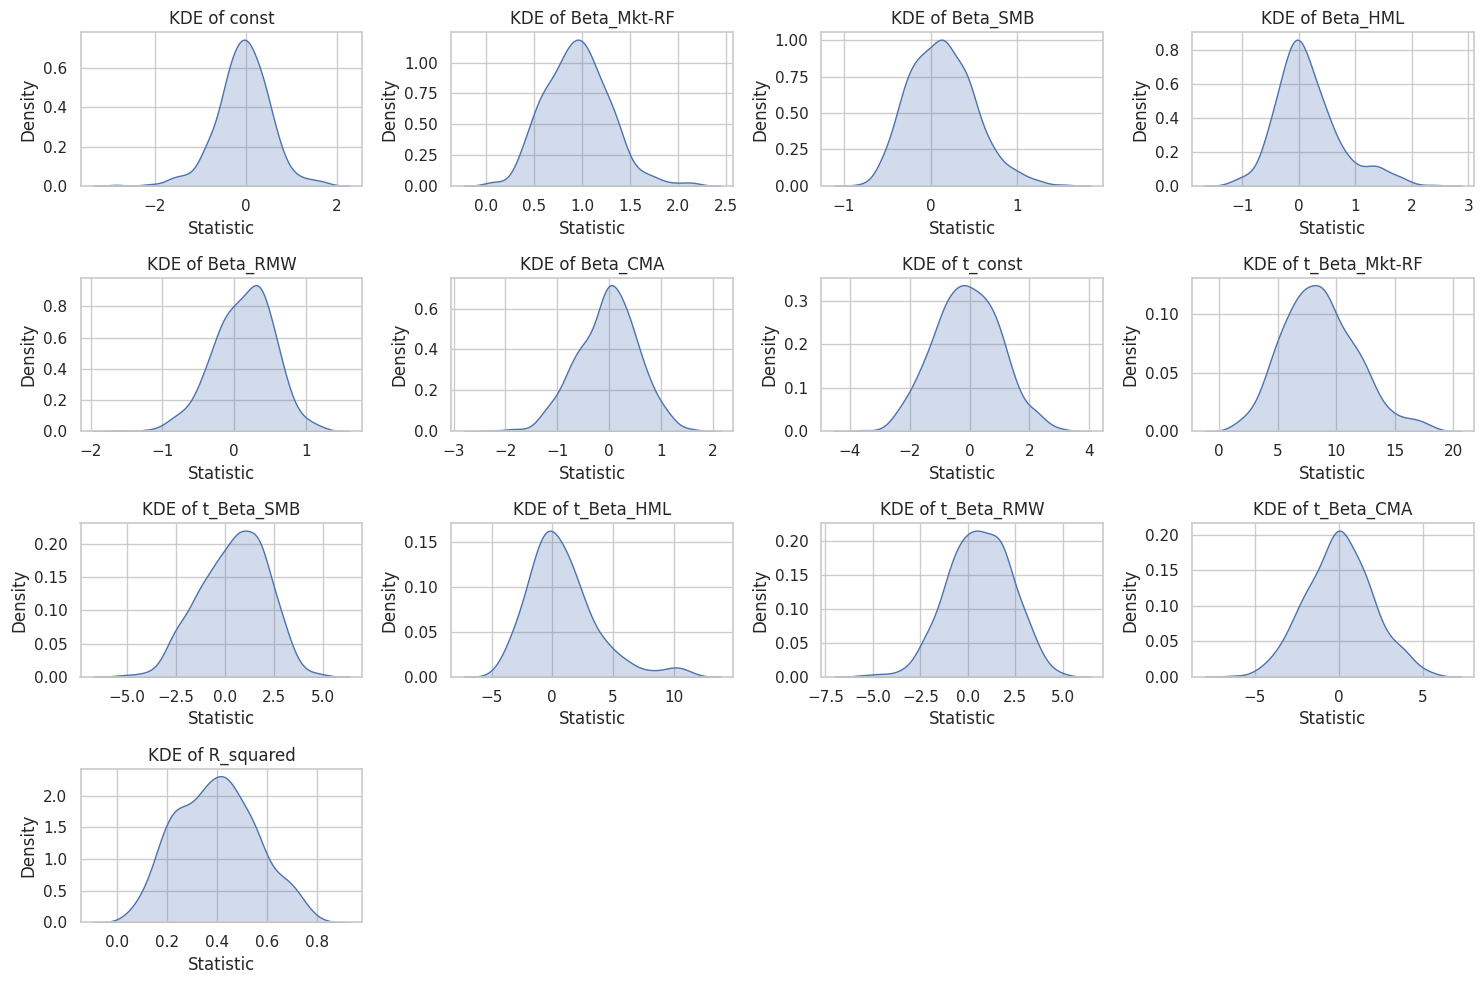

In [ ]:
plt.figure(figsize=(15, 10))

# Plot each t-statistic's density
for i, col in enumerate(results_df_monthly):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(results_df_monthly[col], fill=True)
    plt.title(f'KDE of {col}')
    plt.xlabel('Statistic')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

### Summary and Comparison
- **Constant Term (const)**: Both monthly and daily models show a similar distribution centered around 0.
- **Market Risk Premium (Beta_Mkt-RF)**: The monthly model shows a stronger relationship with the market risk premium (mean around 1) compared to the daily model (mean around 0.5).
- **Size Factor (Beta_SMB), Value Factor (Beta_HML), Profitability Factor (Beta_RMW), Investment Factor (Beta_CMA)**: These factors have similar distributions in both monthly and daily models, with means around 0 and narrow spreads.
- **R-squared (R_squared)**: The monthly model has a higher R-squared value (centered around 0.4) indicating worse explanatory power compared to the daily model (centered around 0.4).

### Conclusion
- **Monthly Data**: Provides a stronger relationship with the market risk premium and better overall explanatory power.
- **Daily Data**: Shows a weaker relationship with the market risk premium and lower explanatory power, indicating that daily returns are more volatile and harder to explain using the Fama-French factors.

This comparison suggests that temporal aggregation to a monthly frequency enhances the model’s explanatory power and provides a clearer relationship between stock returns and the Fama-French factors.

#Question 8

In [ ]:
def perform_regression_one_day_ahead(data, stock_symbol):
    # Calculate one-day-ahead excess returns
    y = data[stock_symbol].shift(-1) - data['RF_ff'].shift(-1)
    X = data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA_ff']]
    X = sm.add_constant(X)  # Add a constant term for the intercept

    model = sm.OLS(y, X, missing='drop')  # 'missing='drop'' to ignore rows with NaN
    results = model.fit()
    # Concatenate the results: params, t-values, and R-squared
    return pd.concat([results.params, results.tvalues, pd.Series(results.rsquared, index=['R_squared'])])

# Ensure 'aligned_data' is the DataFrame with your stock returns and factors
stock_columns = [col for col in aligned_data.columns if col not in ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA_ff', 'RF_ff']]

# Prepare DataFrame to store results
results_df_one_day_ahead = pd.DataFrame(index=stock_columns, columns=np.arange(13))  # 500x13 matrix

# Iterate over each stock to perform regression
for stock in stock_columns:
    regression_result_one_day_ahead = perform_regression_one_day_ahead(aligned_data, stock)
    results_df_one_day_ahead.loc[stock] = regression_result_one_day_ahead.values

# Naming columns appropriately for coefficients, t-stats, and R-squared
results_df_one_day_ahead.columns = ['const', 'Beta_Mkt-RF', 'Beta_SMB', 'Beta_HML', 'Beta_RMW', 'Beta_CMA',
                      't_const', 't_Beta_Mkt-RF', 't_Beta_SMB', 't_Beta_HML', 't_Beta_RMW', 't_Beta_CMA', 'R_squared']

# Display the first few rows of the results to verify
results_df_one_day_ahead.head()


,const,Beta_Mkt-RF,Beta_SMB,Beta_HML,Beta_RMW,Beta_CMA,t_const,t_Beta_Mkt-RF,t_Beta_SMB,t_Beta_HML,t_Beta_RMW,t_Beta_CMA,R_squared
A,0.056034,-0.082469,0.101949,-0.068831,0.005544,-0.098692,1.852791,-2.793897,1.887479,-1.31511,0.076429,-0.998804,0.004101
AAL,0.02474,0.004954,0.374399,-0.103077,0.569802,-0.157091,0.458412,0.094043,3.884388,-1.103634,4.40222,-0.890919,0.00755
AAPL,0.095384,-0.136136,0.111536,-0.088358,-0.022185,-0.086473,3.227288,-4.719326,2.113014,-1.727474,-0.312972,-0.895501,0.008738
ABBV,0.058295,-0.052975,0.086519,0.027609,0.021247,-0.081843,2.345137,-2.183518,1.948843,0.641797,0.356379,-1.007723,0.002278
ABNB,0.000408,0.007446,0.046989,-0.039055,-0.059593,-0.070864,0.015563,0.29068,1.002397,-0.8598,-0.94668,-0.826358,0.002333


In [ ]:
specific_statistics_df_one_day_ahead = pd.DataFrame({
    'Mean': results_df_one_day_ahead.mean(),
    'Variance': results_df_one_day_ahead.var(),
    'Std': results_df_one_day_ahead.std(),
    'Min': results_df_one_day_ahead.min(),
    'Max': results_df_one_day_ahead.max(),
    '25th-Percentile': results_df_one_day_ahead.quantile(0.25),
    'Median': results_df_one_day_ahead.median(),
    '75th-Percentile': results_df_one_day_ahead.quantile(0.75),
    'Interquartile-Range': results_df_one_day_ahead.quantile(0.75) - results_df_one_day_ahead.quantile(0.25),
    'Skewness': results_df_one_day_ahead.skew(),
    'Kurtosis': results_df_one_day_ahead.kurtosis()
})
specific_statistics_df_one_day_ahead

,Mean,Variance,Std,Min,Max,25th-Percentile,Median,75th-Percentile,Interquartile-Range,Skewness,Kurtosis
const,0.052034,0.000721,0.026847,-0.022452,0.160066,0.034362,0.050783,0.068288,0.033926,0.299564,0.685669
Beta_Mkt-RF,-0.105338,0.002944,0.054263,-0.342536,0.07008,-0.137842,-0.103905,-0.071098,0.066744,-0.428475,1.427375
Beta_SMB,0.103744,0.005445,0.073788,-0.142763,0.439142,0.054896,0.099439,0.148466,0.09357,0.512567,1.219613
Beta_HML,-0.066715,0.002807,0.052981,-0.235118,0.12258,-0.098877,-0.066917,-0.032598,0.066279,0.004865,0.495411
Beta_RMW,0.02823,0.005509,0.074226,-0.378395,0.569802,-0.010197,0.028023,0.065457,0.075654,0.342999,8.455355
Beta_CMA,-0.049147,0.013888,0.117846,-0.529009,0.235885,-0.100669,-0.033568,0.025028,0.125697,-0.887267,1.343111
t_const,1.727818,0.738631,0.859436,-1.403594,3.895088,1.130482,1.761702,2.308441,1.177959,-0.106784,0.061482
t_Beta_Mkt-RF,-3.579276,3.294118,1.814971,-8.847601,3.303182,-4.81995,-3.526113,-2.386374,2.433576,0.011434,0.266165
t_Beta_SMB,1.801975,1.316842,1.147537,-1.696609,5.447358,1.01567,1.821609,2.603341,1.58767,-0.088869,-0.039168
t_Beta_HML,-1.293079,0.996171,0.998083,-4.352759,1.509027,-1.958456,-1.283461,-0.620487,1.337969,-0.059664,-0.068298


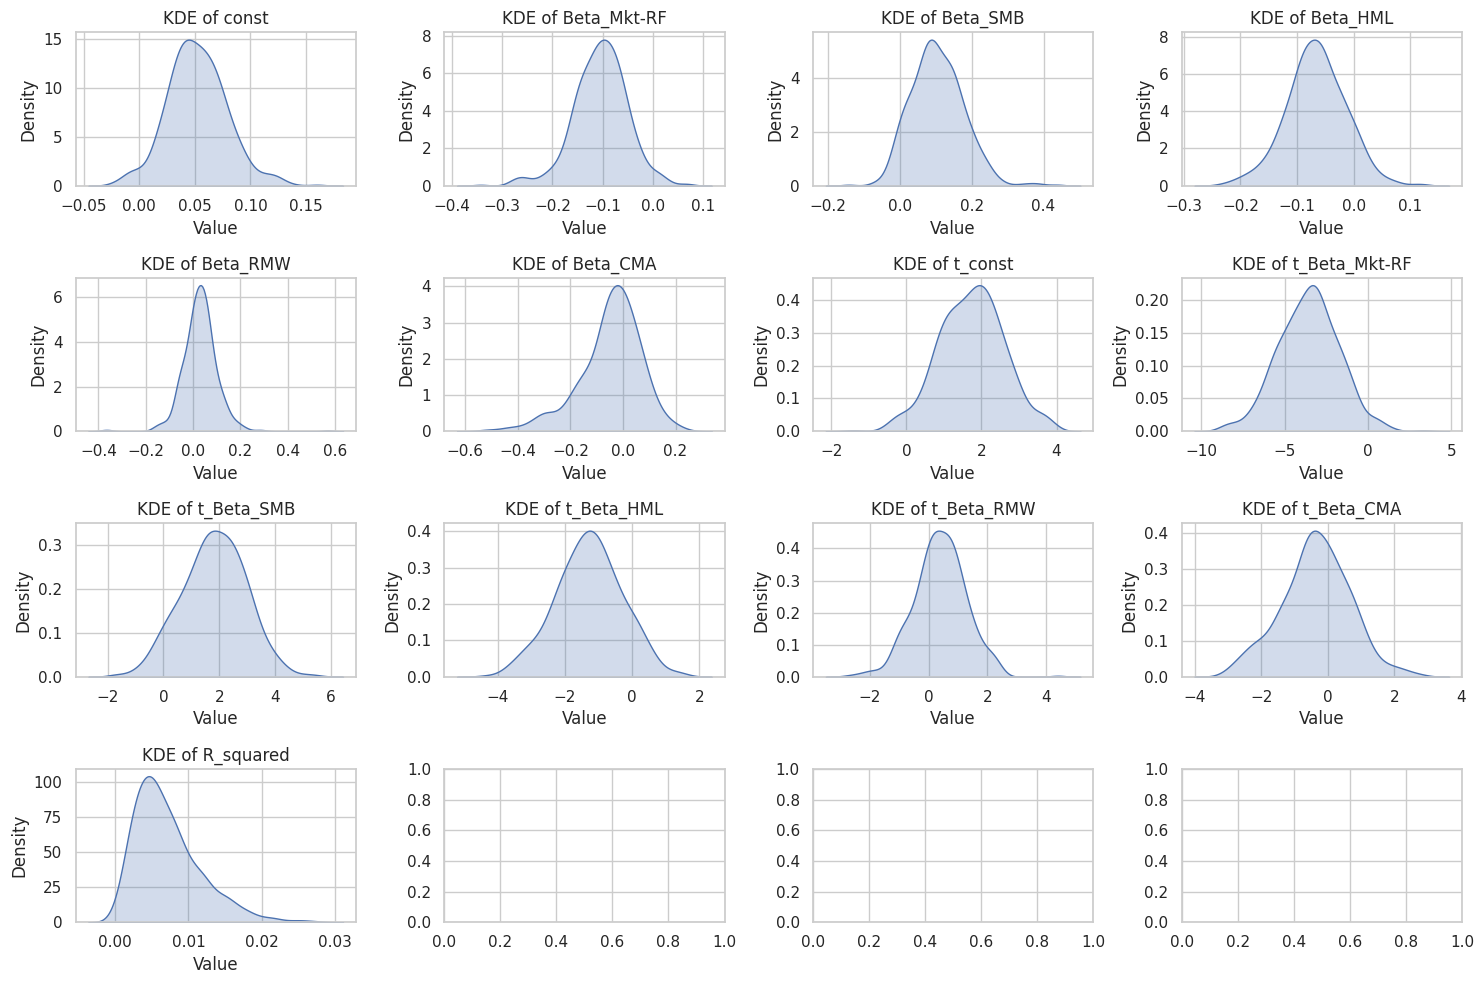

In [ ]:
# Plot each t-statistic's density
fig, axes = plt.subplots(4, 4, figsize=(15, 10))  # Adjust subplot grid and figure size as necessary
axes = axes.flatten()  # Flatten the axis array for easy iteration

for i, col in enumerate(results_df_one_day_ahead.columns):
    sns.kdeplot(results_df_one_day_ahead[col], fill=True, ax=axes[i])
    axes[i].set_title(f'KDE of {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

### Conclusion

By comparing the two sets of plots, we can conclude the following:

1. **Constant Term Differences**: The first model (immediate regression model) has a higher mean for the constant term, while the second model (one-day-ahead regression model) has a mean closer to zero. This suggests that when using one-day-ahead excess returns, the model estimates a significantly lower constant term.

2. **Factor Coefficient Differences**: The factor coefficients (Betas) in both models are generally close to zero, but the coefficients in the second model (one-day-ahead regression model) are more concentrated. This indicates that the one-day-ahead regression model produces more conservative and consistent estimates for the factors.

3. **R-squared Differences**: The R-squared values for the first model are mostly concentrated in the lower range, indicating limited explanatory power. In contrast, the second model shows a broader distribution with higher mean R-squared values, suggesting that the one-day-ahead regression model better explains the variation in excess returns.

Overall, the one-day-ahead regression model is more conservative in estimating factor coefficients and improves the model's explanatory power compared to the immediate regression model.

#Question 9

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def perform_random_forest_regression(data, stock_symbol):
    y = data[stock_symbol] - data['RF_ff']
    X = data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA_ff']]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    predictions = model.predict(X)
    score = model.score(X, y)  # Coefficient of determination R^2

    return predictions, score

# Example usage
predictions, score = perform_random_forest_regression(aligned_data, 'AAPL')
print("R^2 Score:", score)


R^2 Score: 0.9285907468411307


### Analysis and Comparison

- **Higher R^2 Score**: The R^2 score of 0.9286 from the Random Forest Regression model indicates a very high proportion of variance in AAPL's excess returns is explained by the Fama-French factors. This is significantly higher than typical R^2 values seen in linear regression models for stock returns, which usually range between 0.2 to 0.7.

- **Non-linear Relationships**: The Random Forest model captures non-linear relationships and interactions between the factors, which a linear model may not. This is likely why we see a much higher R^2 score.

- **Robustness**: Random Forest models are less prone to overfitting compared to traditional linear regression models when appropriately tuned, providing a more robust fit.

In conclusion, using Random Forest Regression to link Fama-French factors to excess returns results in a substantially improved fit compared to the linear regression model. This demonstrates the effectiveness of machine learning algorithms in capturing complex relationships in financial data.

#Question 10

Incorporating additional factors into the Fama-French model can enhance its explanatory power by capturing different dimensions of risk and return in the stock market. Here are some potential factors that could be considered:

1. Momentum Factor (MOM)
The momentum factor captures the tendency of stocks that have performed well in the past to continue performing well in the near future, and vice versa. It is calculated as the difference in returns between the top decile and bottom decile of stocks sorted by past performance over a specific period.

2. Low Volatility Factor
This factor is based on the observation that stocks with lower volatility tend to generate higher risk-adjusted returns than more volatile stocks. It can be constructed by contrasting the returns of stocks with the lowest volatility with those of the highest volatility.

3. Quality Factor
The quality factor refers to stocks that are characterized by low debt, stable earnings growth, and high profitability. Such stocks tend to outperform in the long run, providing a possible factor for consideration.

4. Market Sentiment (VIX or Similar Metrics)
Using an index such as the VIX, which measures market volatility expectations, could help model how market sentiment affects returns. The VIX is often referred to as the "fear index" and tends to be inversely related to the market performance.